In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [6]:
# Without Normalising

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [8]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(10,input_dim=3,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=2000,validation_data=(X_test,y_test),verbose=1)

Epoch 1/2000
10/10 [==============================] - 0s 22ms/step - loss: 2730.0300 - accuracy: 0.6219 - val_loss: 1803.5286 - val_accuracy: 0.7250
Epoch 2/2000
10/10 [==============================] - 0s 3ms/step - loss: 2193.4128 - accuracy: 0.6219 - val_loss: 1419.0574 - val_accuracy: 0.7250
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 1677.3235 - accuracy: 0.6219 - val_loss: 1021.9378 - val_accuracy: 0.7250
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 1127.9216 - accuracy: 0.6219 - val_loss: 617.7791 - val_accuracy: 0.7250
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 573.4407 - accuracy: 0.6219 - val_loss: 196.0410 - val_accuracy: 0.7250
Epoch 6/2000
10/10 [==============================] - 0s 3ms/step - loss: 142.2606 - accuracy: 0.4781 - val_loss: 225.0867 - val_accuracy: 0.2750
Epoch 7/2000
10/10 [==============================] - 0s 3ms/step - loss: 114.5325 - accuracy: 0.4094 - val_loss: 42

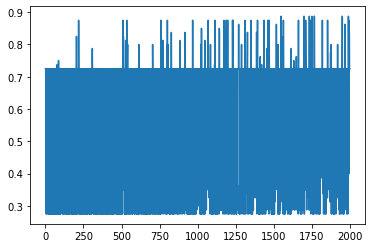

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

In [14]:
# Normalize inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_trains,X_tests,y_trains,y_tests = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [17]:
model1 = Sequential()
model1.add(Dense(10,input_dim=3,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [18]:
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model1.fit(X_trains,y_trains,epochs=200,validation_data=(X_tests,y_tests),verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: 0.6664 - accuracy: 0.6531 - val_loss: 0.6725 - val_accuracy: 0.6000
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6531 - val_loss: 0.6530 - val_accuracy: 0.6000
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6531 - val_loss: 0.6350 - val_accuracy: 0.6000
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6500 - val_loss: 0.6176 - val_accuracy: 0.6250
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.6625 - val_loss: 0.6013 - val_accuracy: 0.6625
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7000 - val_loss: 0.5868 - val_accuracy: 0.7000
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7219 - val_loss: 0.5723 - val_accuracy: 0.7000
Epoch 8/200


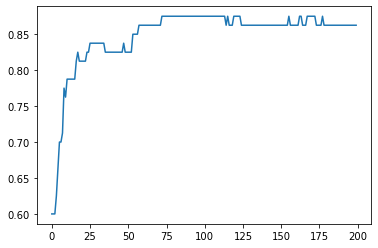

In [20]:
plt.plot(history.history['val_accuracy'])

In [21]:
X_scaled

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])